# Random Forest Hyperparamter Tuning


The fundamental of Random Forest (RF) model can be systematically learnt in books: Hands-on ML.., but the book only provides classifier.    
sklearn doc is good sourse to learn random forest. 
Dr. Schrier play this: https://www.wolframcloud.com/obj/jschrier0/Published/2023.11.30_towards_better_ML.nb

# Import Packages and Load Datasets

In [1]:
import platform
print("python version: ", platform.python_version())

python version:  3.11.7


In [2]:
import numpy as np
import pandas as pd

print("np version: ", np.__version__)
print("pd version: ", pd.__version__)

np version:  1.26.4
pd version:  2.1.4


In [3]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# For save and load RF model
import joblib
# For hypterparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print("sklearn version: ", sklearn.__version__)

sklearn version:  1.2.2


In [4]:
# Read the excel file

dataset_path = "../au2c00122_si_002.xlsx"
train_dataset = pd.read_excel(dataset_path, sheet_name='training set')
val_dataset = pd.read_excel(dataset_path, sheet_name='validation set')

val_dataset.head()

,ECFP-1,ECFP-2,ECFP-3,ECFP-4,ECFP-5,ECFP-6,ECFP-7,ECFP-8,ECFP-9,ECFP-10,...,Second IE_metal (kJ/mol),Third IE_metal (kJ/mol),Electron Affinity_metal (kJ/mol),Atomic Radius_metal,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),log_D,reference
0,0,0,0,0,0,0,0,0,0,0,...,1341.1,2022.3,32.8,2.24,1.74,1.00,0.861,51.0,0.342423,1
1,0,0,0,0,0,0,0,0,0,0,...,1068.1,2257.8,15.6,2.36,1.85,1.17,0.958,69.5,0.505150,1
2,0,0,0,0,0,0,0,0,0,0,...,1166.5,1990.5,13.2,2.34,1.82,1.20,0.938,67.9,0.230449,1
3,0,0,0,0,0,0,0,0,0,0,...,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1,0.041393,1
4,0,0,0,0,0,0,0,0,0,0,...,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1,1.344392,2


# Data preparation

In [5]:
# Split x and y
x_train_df = train_dataset.iloc[:, 0:2291]
y_train_df = train_dataset.iloc[:, 2291]
x_val_df = val_dataset.iloc[:, 0:2291]
y_val_df = val_dataset.iloc[:, 2291]

# Convert df to numpy array
x_train = x_train_df.to_numpy()
y_train = y_train_df.to_numpy()
x_val = x_val_df.to_numpy()
y_val = y_val_df.to_numpy()

print(x_train[0])
print(y_train[0])
print(x_train.shape)

[ 0.    0.    0.   ...  1.1   1.03 56.9 ]
0.477121255
(1085, 2291)


The random forest doesn't have validation dataset. I can combine all val dataset to train set. I think this way makes more sense.

In [6]:
# # Concat x_val_df to x_train_df
# x_train_val_df = pd.concat([x_train_df, x_val_df])
# y_train_val_df = pd.concat([y_train_df, y_val_df])

# # Convert df to numpy array
# x_train_val = x_train_val_df.to_numpy()
# y_train_val = y_train_val_df.to_numpy()

# Build and train the RF model

## hp tuning and find best model

param_grid list: see [RandomForestRegressor doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)  
GridSearchCV scoring list: https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring  

In [7]:
regrRFmodel = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(regrRFmodel, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [8]:
best_rf_model = grid_search.best_estimator_

# Save the model to a file
model_filename = 'rf_model.sav'
joblib.dump(best_rf_model, model_filename)
print(f'Model saved as {model_filename}')

Model saved as rf_model.sav


## Direct training

In [9]:
# regrRFmodel = RandomForestRegressor(n_estimators=100, random_state=42)
# regrRFmodel.fit(x_train, y_train)

In [10]:
# # Save the model to a file
# model_filename = 'rf_model.sav'
# joblib.dump(regrRFmodel, model_filename)
# print(f'Model saved as {model_filename}')

# Evaluate the model

In [11]:
# Load the saved model

# model_filename = 'rf_model.sav'
loaded_rf_model = joblib.load(model_filename)

In [12]:
# Evaluate trained model

y_train_pred = loaded_rf_model.predict(x_train)

# Evaluate the loaded model's performance
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print(f'Loaded Model MAE for train dataset: {mae_train}')
print(f'Loaded Model RMSE for train dataset: {rmse_train}')
print(f'Loaded Model R-Square for train dataset: {r2_train}')

Loaded Model MAE for train dataset: 0.09096940609073476
Loaded Model RMSE for train dataset: 0.15782631697706448
Loaded Model R-Square for train dataset: 0.9866879780300021


In [13]:
# Evaluate trained model for val dataset

y_val_pred = loaded_rf_model.predict(x_val)

# Evaluate the loaded model's performance
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print(f'Loaded Model MAE for val dataset: {mae_val}')
print(f'Loaded Model RMSE for val dataset: {rmse_val}')
print(f'Loaded Model R-Square for val dataset: {r2_val}')

Loaded Model MAE for val dataset: 0.21896613552259092
Loaded Model RMSE for val dataset: 0.326667605304762
Loaded Model R-Square for val dataset: 0.9425809937567444


In [ ]:
# # Evaluate trained model for train and val dataset

# y_train_val_pred = loaded_rf_model.predict(x_train_val)

# # Evaluate the loaded model's performance
# mae_train_val = mean_absolute_error(y_train_val, y_train_val_pred)
# rmse_train_val = np.sqrt(mean_squared_error(y_train_val, y_train_val_pred))
# r2_train_val = r2_score(y_train_val, y_train_val_pred)

# print(f'Loaded Model MAE for val dataset: {mae_train_val}')
# print(f'Loaded Model RMSE for val dataset: {rmse_train_val}')
# print(f'Loaded Model R-Square for val dataset: {r2_train_val}')

### Test set evaluation

In [14]:
dataset_path_testset = "../au2c00122_si_002.xlsx"
test_dataset = pd.read_excel(dataset_path_testset, sheet_name='new ligands 1-4 as the test set')

In [15]:
# Split x and y
x_test_df = test_dataset.iloc[:, 0:2291]
y_test_df = test_dataset.iloc[:, 2291]

# Convert df to numpy array
x_test = x_test_df.to_numpy()
y_test = y_test_df.to_numpy()

print(x_test[0])
print(y_test[0])
print(x_test.shape)

[ 0.    1.    0.   ...  1.1   1.03 56.9 ]
-2.08922
(56, 2291)


In [16]:
# Evaluate trained model

y_test_pred = loaded_rf_model.predict(x_test)

# Evaluate the loaded model's performance
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f'Loaded Model MAE for test dataset: {mae_test}')
print(f'Loaded Model RMSE for test dataset: {rmse_test}')
print(f'Loaded Model R-Square for test dataset: {r2_test}')

Loaded Model MAE for test dataset: 0.470731413655982
Loaded Model RMSE for test dataset: 0.6309515581540819
Loaded Model R-Square for test dataset: 0.6945119298044291


# Feature Importance

In [20]:
import matplotlib
import matplotlib.pyplot as plt

print("matplotlib version: ", matplotlib.__version__)

matplotlib version:  3.8.0


                           Feature  Importance
2072                  BCUT2D_MRLOW    0.243431
2049                MinEStateIndex    0.093417
2289           Ionic Radius_metal     0.056726
2059              MinPartialCharge    0.031517
2070                BCUT2D_LOGPLOW    0.024079
2274                   acid c.c./M    0.023487
2071                   BCUT2D_MRHI    0.021665
2277          Atomic Number_metal     0.018275
2051             MinAbsEStateIndex    0.016780
2278  Outer shell electrons_metal     0.016682


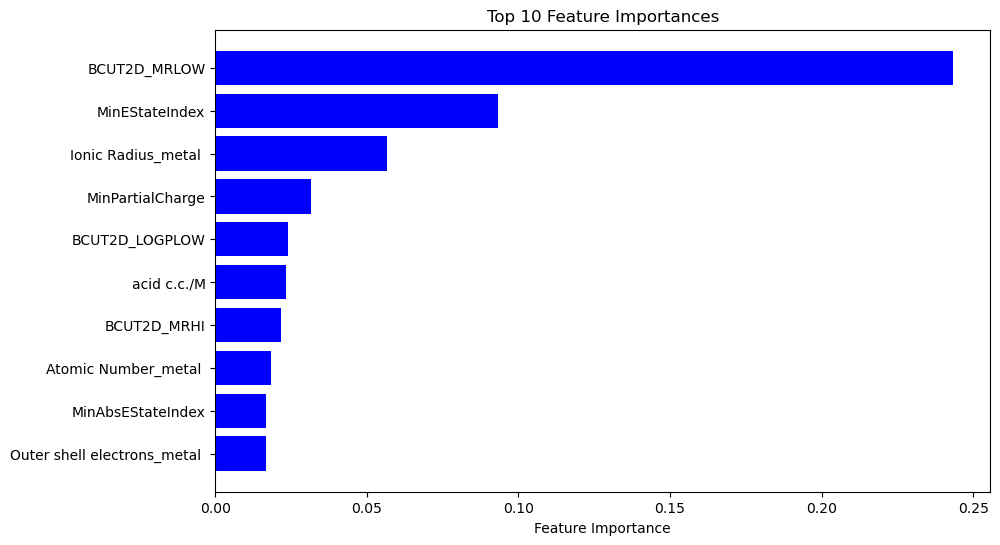

In [21]:
# Get feature importances from the model
feature_importances = loaded_rf_model.feature_importances_

# If you have feature names (e.g., from a DataFrame), use them here
# Assuming you have a DataFrame with column names for features
feature_names = x_train_df.columns  # Uncomment this if you have feature names

# If no feature names are available, you can assign generic ones
# feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Convert the importances into a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance, in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
top_n = 10  # Change this value as needed
print(feature_importance_df.head(top_n))

# Plotting the top N important features
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances")
plt.barh(feature_importance_df['Feature'].head(top_n), feature_importance_df['Importance'].head(top_n), color='b')
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

                          Feature Group  Total Importance
1                        RDkit Features          0.685482
11              lan_features_importance          0.133036
6         solvent_b_features_importance          0.038561
0                  Figureprint Features          0.036097
5         solvent_a_features_importance          0.033292
8         acid_conc_features_importance          0.018275
9                 T_features_importance          0.016682
7       acid_dipole_features_importance          0.012398
4             vol_b_features_importance          0.008152
10         lan_conc_features_importance          0.004750
3             vol_a_features_importance          0.000540
2   extractant_conc_features_importance          0.000466


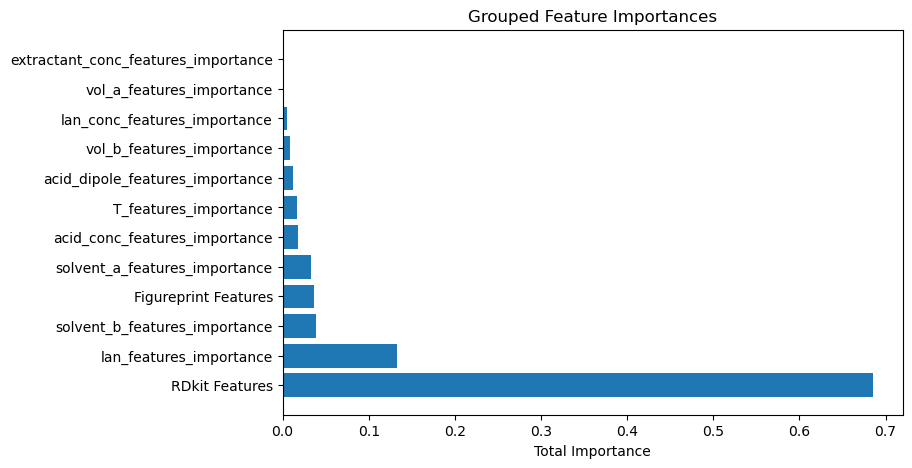

In [26]:
# Get feature importances from the trained model
feature_importances = loaded_rf_model.feature_importances_

# Define the group ranges (208 rdkit features and 2048 fingerprint features)
fp_features_importance = feature_importances[:2048]
rdkit_features_importance = feature_importances[2048:2048+208]
extractant_conc_features_importance = feature_importances[208+2048+1]  # ligand c.c./mM
vol_a_features_importance = feature_importances[208+2048+2]  # volume ratio of solvent a
vol_b_features_importance = feature_importances[208+2048+3]  # volume ratio of solvent b
solvent_a_features_importance = feature_importances[2260:2267]
solvent_b_features_importance = feature_importances[208+2048+12:208+2048+19] # organic solvent b descriptors
acid_dipole_features_importance = feature_importances[208+2048+20] # aicd dipole moment
acid_conc_features_importance = feature_importances[208+2048+21]  # acid c.c./M
T_features_importance = feature_importances[208+2048+22] # temperature
lan_conc_features_importance = feature_importances[208+2048+23]  # Ln c.c./mM
lan_features_importance = feature_importances[(208+2048+24):2291] # lanthanides descriptors

# Calculate total importance for each group
fp_importance_total = np.sum(fp_features_importance)
rdkit_importance_total = np.sum(rdkit_features_importance)
solvent_a_features_importance_total = np.sum(solvent_a_features_importance)
solvent_b_features_importance_total = np.sum(solvent_b_features_importance)
lan_features_importance_total = np.sum(lan_features_importance)

# Create a DataFrame to store the grouped feature importance
grouped_importance_df = pd.DataFrame({
    'Feature Group': ['Figureprint Features', 'RDkit Features', 'extractant_conc_features_importance','vol_a_features_importance',
'vol_b_features_importance','solvent_a_features_importance','solvent_b_features_importance','acid_dipole_features_importance',
'acid_conc_features_importance', 'T_features_importance','lan_conc_features_importance', 'lan_features_importance'],
    'Total Importance': [fp_importance_total, rdkit_importance_total,extractant_conc_features_importance,\
                         vol_a_features_importance,vol_b_features_importance,solvent_a_features_importance_total,solvent_b_features_importance_total,
                         acid_dipole_features_importance,acid_conc_features_importance,T_features_importance,lan_conc_features_importance,
                        lan_features_importance_total]
})


# Sort the DataFrame by importance, in descending order
grouped_importance_df = grouped_importance_df.sort_values(by='Total Importance', ascending=False)

# Display the grouped feature importance
print(grouped_importance_df)

# Plot the grouped feature importance
plt.figure(figsize=(8, 5))
plt.title("Grouped Feature Importances")
plt.barh(grouped_importance_df['Feature Group'], grouped_importance_df['Total Importance'])
plt.xlabel("Total Importance")
plt.show()